# Allah

print("Allah")

In [13]:
import pandas as pd
import numpy as np

In [14]:
# df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")
# df.to_csv("titanic.csv",index = False)

In [20]:
ddd = pd.read_csv("titanic.csv")
ddd.isnull().value_counts()
df =ddd

In [21]:
ddd.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.shape

(891, 12)

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
# 1 Means Survived
# 0 died
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
df.groupby(df.Survived).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Pclass'>

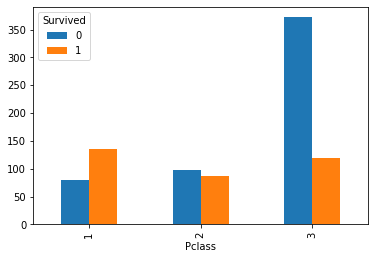

In [28]:
pd.crosstab(df.Pclass,df.Survived).plot(kind ='bar')

In [29]:
# kashti pr kitni sister and brother ka set tha ,matlab  
# 0 bhani,bhayn ...only one passenger
# 1 ,1 bhai or 1 sister
# 2 ,2 bhai or 2 sister
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp'>

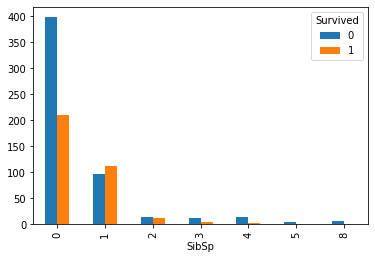

In [30]:
pd.crosstab(df.SibSp,df.Survived).plot(kind ='bar')

In [31]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [32]:
df.Fare.max()

512.3292

In [33]:
df.Fare.min()

0.0

In [34]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
# As per our Exercise some colums are droped so let start

In [36]:
df.drop(columns={'PassengerId','Name','Ticket','Parch','Cabin','Embarked'},inplace =True)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [38]:
# now Male colum is in Text so we Convert into categoried 0,1 format
# so we Use Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['Sex_n'] = le.fit_transform(df.Sex)

In [40]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare,Sex_n
0,0,3,male,22.0,1,7.2500,1
1,1,1,female,38.0,1,71.2833,0
2,1,3,female,26.0,0,7.9250,0
3,1,1,female,35.0,1,53.1000,0
4,0,3,male,35.0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,1
887,1,1,female,19.0,0,30.0000,0
888,0,3,female,NaN,1,23.4500,0
889,1,1,male,26.0,0,30.0000,1


In [41]:
# so we Drop Sex  Columns
df.drop(columns= {'Sex'},inplace =True)

In [42]:
df.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_n
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,0,3,35.0,0,8.0500,1


In [43]:
df['Pclass'].isnull().sum()

0

In [44]:
df['Age'].isnull().sum()

177

In [45]:
df['SibSp'].isnull().sum()

0

In [46]:
df['Fare'].isnull().sum()

0

In [47]:
df['Sex_n'].isnull().sum()

0

In [48]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Fare          0
Sex_n         0
dtype: int64

In [49]:
df.shape

(891, 6)

In [50]:
# Now Use Decision Tree Model 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model


DecisionTreeClassifier()

In [51]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Fare          0
Sex_n         0
dtype: int64

# Drop Nan value with Variable df_drop

In [52]:
df.shape

(891, 6)

In [53]:
df_drop = df.dropna()

In [54]:
df_drop.shape

(714, 6)

In [55]:
df_drop.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Fare        0
Sex_n       0
dtype: int64

In [56]:
df_drop.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_n
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,0,3,35.0,0,8.0500,1


In [57]:
# Now we do Data Splitting
input = df_drop[['Pclass','Age','SibSp','Fare','Sex_n']]
input.head()

,Pclass,Age,SibSp,Fare,Sex_n
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1


In [58]:
target = df_drop['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
# Now Use Decision Tree Model 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [61]:
model.fit(input,target)

DecisionTreeClassifier()

In [63]:
model.score(input,target)

0.9859943977591037

In [65]:
input.head(3)

,Pclass,Age,SibSp,Fare,Sex_n
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0


In [67]:
model.predict([[3,22.0,1,7.2500,1]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [68]:
ddd.head(3)

,Survived,Pclass,Age,SibSp,Fare,Sex_n
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0


In [77]:
df.tail()

,Survived,Pclass,Age,SibSp,Fare,Sex_n
886,0,2,27.0,0,13.00,1
887,1,1,19.0,0,30.00,0
888,0,3,NaN,1,23.45,0
889,1,1,26.0,0,30.00,1
890,0,3,32.0,0,7.75,1


In [76]:
# apply your model data and tele with last ddd.head() value because it give orginal value
# you took value from df_drop data and tele with ddd.head
model.predict([[1,38.0,1,71.3283,0]])  # you tele from Survived colums it is 0 died and 1 Alive

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [75]:
model.predict([[1,26,0,7.9250,0]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [80]:
model.predict([[1,26.0,0,30.00,1]])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# age have Nan value we make two varible of Original dataset

In [81]:
ddd.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_n
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,0,3,35.0,0,8.0500,1


In [83]:
ddd.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Fare          0
Sex_n         0
dtype: int64

In [87]:
ddd.Age.fillna(ddd.Age.mean(),inplace=True)

In [88]:
#let checj Nan value in age colum or all data
ddd.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Fare        0
Sex_n       0
dtype: int64

In [115]:
XX = ddd[['Pclass','Age','SibSp','Fare','Sex_n']]
XX.head()

,Pclass,Age,SibSp,Fare,Sex_n
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1


In [116]:
yy = ddd['Survived']
yy.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Use Train test split method

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(XX,yy,test_size=0.2)

In [118]:
len(X_train)

712

In [119]:
len(X_test)

179

# use Decision Tree

In [120]:
from sklearn import tree
modell= tree.DecisionTreeClassifier()
modell

DecisionTreeClassifier()

In [121]:
modell.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
modell.score(X_test,y_test)

0.7877094972067039